In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# run
import tarfile
import cv2
import matplotlib.pyplot as plt
import numpy as np

Cell to download the IIIT5K-Word dataset

In [ ]:
# Path to your tar.gz file
tar_path = '/content/drive/My Drive/Colab Notebooks/IIIT5K-Word_V3.0.tar.gz'

# Extract the tar.gz file
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path='/content/drive/My Drive/Colab Notebooks/')


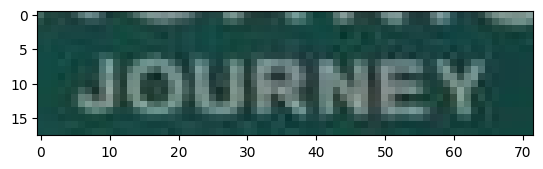

In [ ]:

image1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/IIIT5K/test/1023_7.png")
# cv2.imshow('Image', image1) cv23.imshow is disabled on colab
if(image1 is None):
  print("None")
image_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()




In [4]:
# run
# testdata.mat is extracted with matlab script
import pandas as pd
test_ground_truth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIIT5K/img_ground_truth.csv")
test_ground_truth

,ImgName,GroundTruth
0,test/1002_1.png,PRIVATE
1,test/1002_2.png,PARKING
2,test/1009_1.png,SALUTES
3,test/100_1.png,DOLCE
4,test/100_2.png,GABBANA
...,...,...
2995,test/997_9.png,DAY
2996,test/999_1.png,HOW
2997,test/999_6.png,AT
2998,test/999_7.png,70


In [ ]:
# preprcess the ground truth : make imgname to string and groundtruth not capital?
# case insensitvity?
import pandas as pd
train_ground_truth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIIT5K/img_ground_truth_train.csv")
train_ground_truth

,ImgName,GroundTruth
0,train/1009_2.png,YOU
1,train/1017_1.png,RESCUE
2,train/1017_2.png,MISSION
3,train/1021_1.png,HOME
4,train/1023_1.png,BORDER
...,...,...
1995,train/997_7.png,FOR
1996,train/999_2.png,TO
1997,train/999_3.png,WRITE
1998,train/999_4.png,GREAT


In [ ]:
# ignore this cell
data = scipy.io.loadmat("/content/drive/MyDrive/Colab Notebooks/IIIT5K/testdata.mat")
test_data = data['testdata']
test_data[:10]

**Showing what can we change for the configuration of the model**

In [2]:
from transformers import PretrainedConfig
config = PretrainedConfig.from_pretrained('alibaba-damo/mgp-str-base')
config

You are using a model of type mgp-str to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


PretrainedConfig {
  "_name_or_path": "alibaba-damo/mgp-str-base",
  "architectures": [
    "MGPSTRModel"
  ],
  "attn_drop_rate": 0.0,
  "drop_path_rate": 0.0,
  "drop_rate": 0.0,
  "hidden_size": 768,
  "image_size": [
    32,
    128
  ],
  "max_token_length": 27,
  "mlp_ratio": 4,
  "num_attention_heads": 12,
  "num_bpe_labels": 50257,
  "num_channels": 3,
  "num_character_labels": 38,
  "num_hidden_layers": 12,
  "num_wordpiece_labels": 30522,
  "output_a3_attentions": false,
  "patch_size": 4,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.35.2"
}

## Without augmentation:
1. Using state of the art, ... method for scene text recognition

Description of the model: MGP-STR which is built upon the Vision Transformer (ViT). To integrate linguistic knowledge, Multi-Granularity Prediction (MGP) strategy is proposed to inject information from the language modality into the model in an implicit way.



"MGP-STR is trained on two synthetic datasets MJSynth (MJ) and SynthText(ST) without fine-tuning on other datasets. It achieves state-of-the-art results on six standard Latin scene text benchmarks, including 3 regular text datasets (IC13, SVT, IIIT) and 3 irregular ones (IC15, SVTP, CUTE)."

In [6]:
# run
# code from https://huggingface.co/docs/transformers/model_doc/mgp-str#transformers.MgpstrForSceneTextRecognition
# Pre Trained model from Hugging Model
from transformers import (
    MgpstrProcessor,
    MgpstrForSceneTextRecognition,
)
import requests
from PIL import Image

# load image from the IIIT-5k dataset using the website
url = "https://i.postimg.cc/ZKwLg2Gw/367-14.png"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = MgpstrProcessor.from_pretrained("alibaba-damo/mgp-str-base")
pixel_values = processor(images=image, return_tensors="pt").pixel_values

model = MgpstrForSceneTextRecognition.from_pretrained("alibaba-damo/mgp-str-base")

# inference
outputs = model(pixel_values)
out_strs = processor.batch_decode(outputs.logits)
out_strs["generated_text"]

preprocessor_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/415 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/592M [00:00<?, ?B/s]

['ticket']

In [ ]:
# let's try on our loaded image that says journey
outputs = model( processor(images=image1, return_tensors="pt").pixel_values)
out_strs = processor.batch_decode(outputs.logits)
out_strs["generated_text"]

NameError: ignored

In [5]:
# run
def infer(model, image):
  outputs = model( processor(images=image, return_tensors="pt").pixel_values)
  out_strs = processor.batch_decode(outputs.logits)
  return out_strs["generated_text"]

## With data augmentation

In [ ]:
!pip3 install straug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 19.9 MB/s eta 0:00:00
  Created wheel for magickwand: filename=magickwand-0.2-py3-none-any.whl size=32442 sha256=bdbcdb4a243288eddcf7b77b085aa38758b339c636a9db56ebd61e01556758e0
  Stored in directory: /root/.cache/pip/wheels/65/f7/69/791f1d0761df2c5745fa638dd7ec21c705a30a2d199367c0b2
Successfully built magickwand


In [ ]:
# load some image
url = "https://i.postimg.cc/yxShBY40/5207-1.png"  # PREMONITION image
image2 = Image.open(requests.get(url, stream=True).raw).convert("RGB")


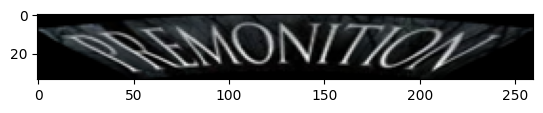

In [ ]:
# augment this image using straug library (first paper)
from straug.warp import Curve

img = Curve()(image2, mag=3) # takes a few seconds to run
plt.imshow(img)


Augmentation works, let's see the rotation effects

In [ ]:
from straug.geometry import *  # check out the github https://github.com/roatienza/straug/blob/main/straug
perspective = Perspective()(image2, mag=3)
rotated = Rotate()(image2, mag=3)
shrinked = Shrink()(image2, mag=3)


ModuleNotFoundError: ignored

In [ ]:
infer(model=model, image = [perspective, rotated, shrinked])

['premonition', 'premonition', 'premonition']

In [ ]:
# enchain the augmentation
from straug.warp import Curve
from straug.geometry import *
image2 = Curve()(image2, mag=3)
perspective = Perspective()(image2, mag=3)
rotated = Rotate()(perspective, mag=3)
shrinked = Shrink()(rotated, mag=3)


NameError: ignored

In [ ]:
plt.imshow(shrinked)
cv2.imread(shrinked)

NameError: ignored

In [ ]:
infer(model=model, image = shrinked) # wow !!

['premonition']

## Accuracy

In [ ]:
test_ground_truth

,ImgName,GroundTruth
0,test/1002_1.png,PRIVATE
1,test/1002_2.png,PARKING
2,test/1009_1.png,SALUTES
3,test/100_1.png,DOLCE
4,test/100_2.png,GABBANA
...,...,...
2995,test/997_9.png,DAY
2996,test/999_1.png,HOW
2997,test/999_6.png,AT
2998,test/999_7.png,70


In [11]:
sample_gt = test_ground_truth# [:1000]
sample_gt
#sample_gt.loc[110]

,ImgName,GroundTruth
0,test/1002_1.png,PRIVATE
1,test/1002_2.png,PARKING
2,test/1009_1.png,SALUTES
3,test/100_1.png,DOLCE
4,test/100_2.png,GABBANA
...,...,...
2995,test/997_9.png,DAY
2996,test/999_1.png,HOW
2997,test/999_6.png,AT
2998,test/999_7.png,70


In [12]:
predictions = []
nb_pred = 0
for _, row in sample_gt.iterrows():

    image_name = row['ImgName']
    image_path = f'/content/drive/MyDrive/Colab Notebooks/IIIT5K/{image_name}'
    # Infer the label
    image = cv2.imread(image_path)
    if(image is  None):
      print("Image not found")
    predicted_label = infer(model=model, image=image)
    nb_pred += 1

    predictions.append(predicted_label)

In [13]:
nb_pred

3000

In [14]:
# Basic metric: Accuracy as in infered text == groundtruth text
# First on the data wihtout augmentation
num_correct_predictions = sum(str(pred[0]).lower() == str(gt).lower() for pred, gt in zip(predictions, sample_gt['GroundTruth']))
accuracy = num_correct_predictions / nb_pred
print(f"Model accuracy without data augmentation: {accuracy:.2%}")

Model accuracy without data augmentation: 96.10%


In [ ]:
!pip install -U albumentations

In [ ]:
# augment data
from straug.warp import Curve
from straug.geometry import *

def augment(image2):
  image2 = Curve()(image2, mag=3)
  perspective = Perspective()(image2, mag=3)
  rotated = Rotate()(perspective, mag=3)
  return rotated



In [ ]:
from PIL import Image
pillow_image = Image.open('/content/drive/MyDrive/Colab Notebooks/IIIT5K/test/1073_1.png')
image_aug = augment(pillow_image)
# to make sure that the size stays the same
print("size before augmentation: ", pillow_image.size)
print("size after augmentation: ",image_aug.size)

size before augmentation:  (183, 39)
size after augmentation:  (183, 39)


In [ ]:
pillow_image = Image.open('/content/drive/MyDrive/Colab Notebooks/IIIT5K/test/2469_2.png')
image_aug = augment(pillow_image)
# to make sure that the size stays the same
print("size before augmentation: ", pillow_image.size)
print("size after augmentation: ",image_aug.size)

size before augmentation:  (287, 272)
size after augmentation:  (287, 272)


predicted =  ['19']


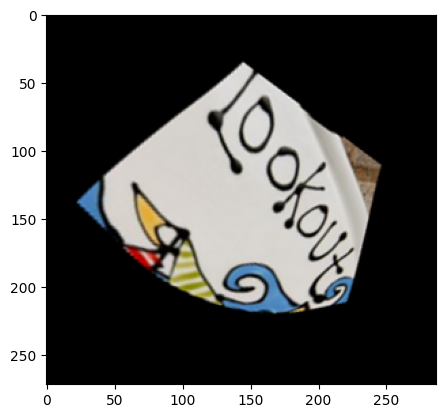

In [ ]:
predicted_label = infer(model=model, image=image_aug)
plt.imshow(image_aug)
print("predicted = ", predicted_label)

In [ ]:
from PIL import Image
predictions_aug = []
nb_pred_aug = 0
for _, row in sample_gt.iterrows():

    image_name = row['ImgName']
    image_path = f'/content/drive/MyDrive/Colab Notebooks/IIIT5K/{image_name}'



    #image = cv2.imread(image_path)
    try:
      image = Image.open(image_path)
    except Exception as e:
      print(f"Error loading image {image_name}: {e}")
      continue
    #image = Image.open(image_path)
    image_aug = augment(image)


    predicted_label = infer(model=model, image=image_aug)
    nb_pred_aug += 1

    predictions_aug.append(predicted_label)

ValueError: ignored

In [ ]:
nb_pred_aug

110

In [ ]:
num_correct_predictions = sum(str(pred[0]).lower() == str(gt).lower() for pred, gt in zip(predictions_aug, sample_gt['GroundTruth']))
accuracy = num_correct_predictions / nb_pred_aug
print(f"Model accuracy with data augmentation: {accuracy:.2%}")

Model accuracy with data augmentation: 74.55%
